In [1]:
from load_modules import * 
from scipy.fft import dct

In [2]:
file_location = "../../data/Raman_Mouse/raw/"
 
filenames = glob.glob(file_location+'/[!Wave|metadata]*.txt')
data = load_files([filenames], True)


start loading data, number of files 51
opening file 1 of 51: ../../data/Raman_Mouse/raw/Liver_map_150z25_60s_#12.txt
loaded  file 1 of 51: ../../data/Raman_Mouse/raw/Liver_map_150z25_60s_#12.txt
opening file 2 of 51: ../../data/Raman_Mouse/raw/Muscle_map_150z25_60s_#34.txt
loaded  file 2 of 51: ../../data/Raman_Mouse/raw/Muscle_map_150z25_60s_#34.txt
opening file 3 of 51: ../../data/Raman_Mouse/raw/Kidney_map_150z25_60s_#45.txt
loaded  file 3 of 51: ../../data/Raman_Mouse/raw/Kidney_map_150z25_60s_#45.txt
opening file 4 of 51: ../../data/Raman_Mouse/raw/Kidney_map_150z25_60s_#43.txt
loaded  file 4 of 51: ../../data/Raman_Mouse/raw/Kidney_map_150z25_60s_#43.txt
opening file 5 of 51: ../../data/Raman_Mouse/raw/Liver_map_150x25_60s_#13.txt
loaded  file 5 of 51: ../../data/Raman_Mouse/raw/Liver_map_150x25_60s_#13.txt
opening file 6 of 51: ../../data/Raman_Mouse/raw/Muscle_map_150z25_60s_#27.txt
loaded  file 6 of 51: ../../data/Raman_Mouse/raw/Muscle_map_150z25_60s_#27.txt
opening file 7 of

In [3]:
n = 0
img, wavenumbers = data[0][n], data[1][n]
img = img.reshape((-1, img.shape[-1]))
img.shape

(3750, 1000)

In [17]:
remove_noise_cube_fft = smoothing.RemoveNoiseFFTPCA(
                algorithm = 'PCA',
                percentage_noise = None,
                wavenumbers = wavenumbers,
                min_FWHM = 7,
                error_function = 'MAPE',
                gradient_width = 10,
                spike_padding = 0,
                max_spike_width = 100)
split = splitting.split(
            wavenumbers = wavenumbers,
            size = img.shape[-1],
            FWHM = 600,
            order = 1,
            convergence = 1e-3,
            segment_width = 400,
        )
tmp_img = remove_noise_cube_fft(img.reshape(-1, img.shape[-1]))
photo = split(tmp_img.reshape(-1, tmp_img.shape[-1]), tmp_img.reshape(-1, tmp_img.shape[-1]))


inner iterations 7
iteration: 0 gives an outer error 959.5611631866709 with a learning rate of 1
inner iterations 5
iteration: 1 gives an outer error 0.03787133010848249 with a learning rate of 1
inner iterations 5
iteration: 2 gives an outer error 0.008913264687227371 with a learning rate of 1
inner iterations 5
iteration: 3 gives an outer error 0.0038476071550148485 with a learning rate of 1
inner iterations 5
iteration: 4 gives an outer error 0.0015749059134658359 with a learning rate of 1
inner iterations 5
iteration: 5 gives an outer error 0.0006689086549289005 with a learning rate of 1
outer iterations 5


2567


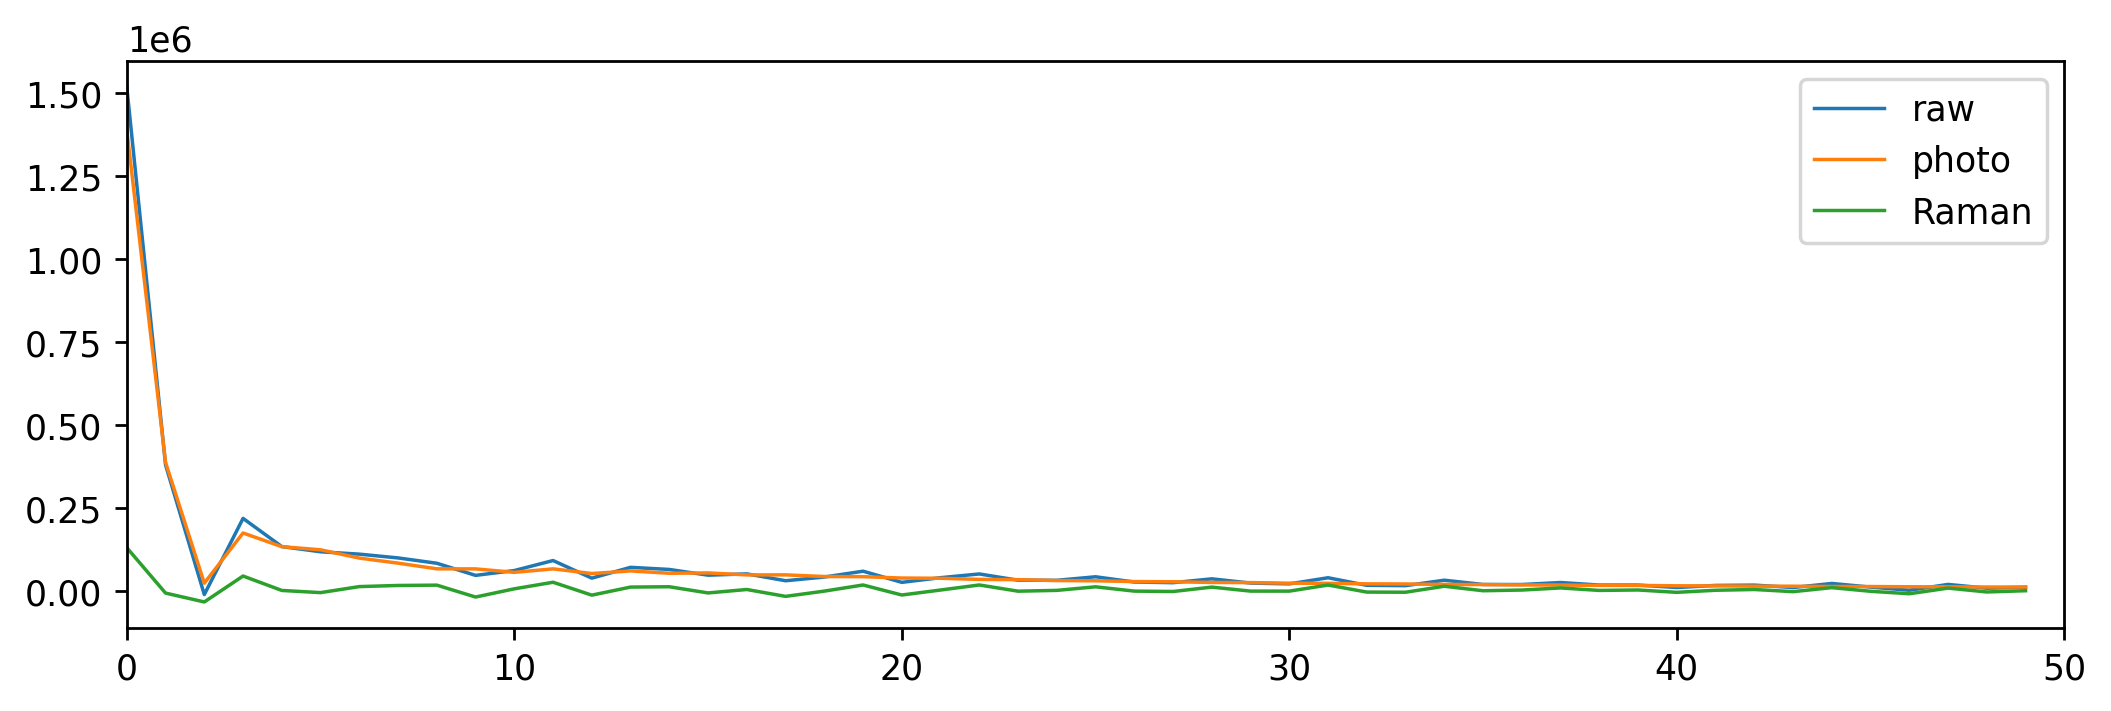

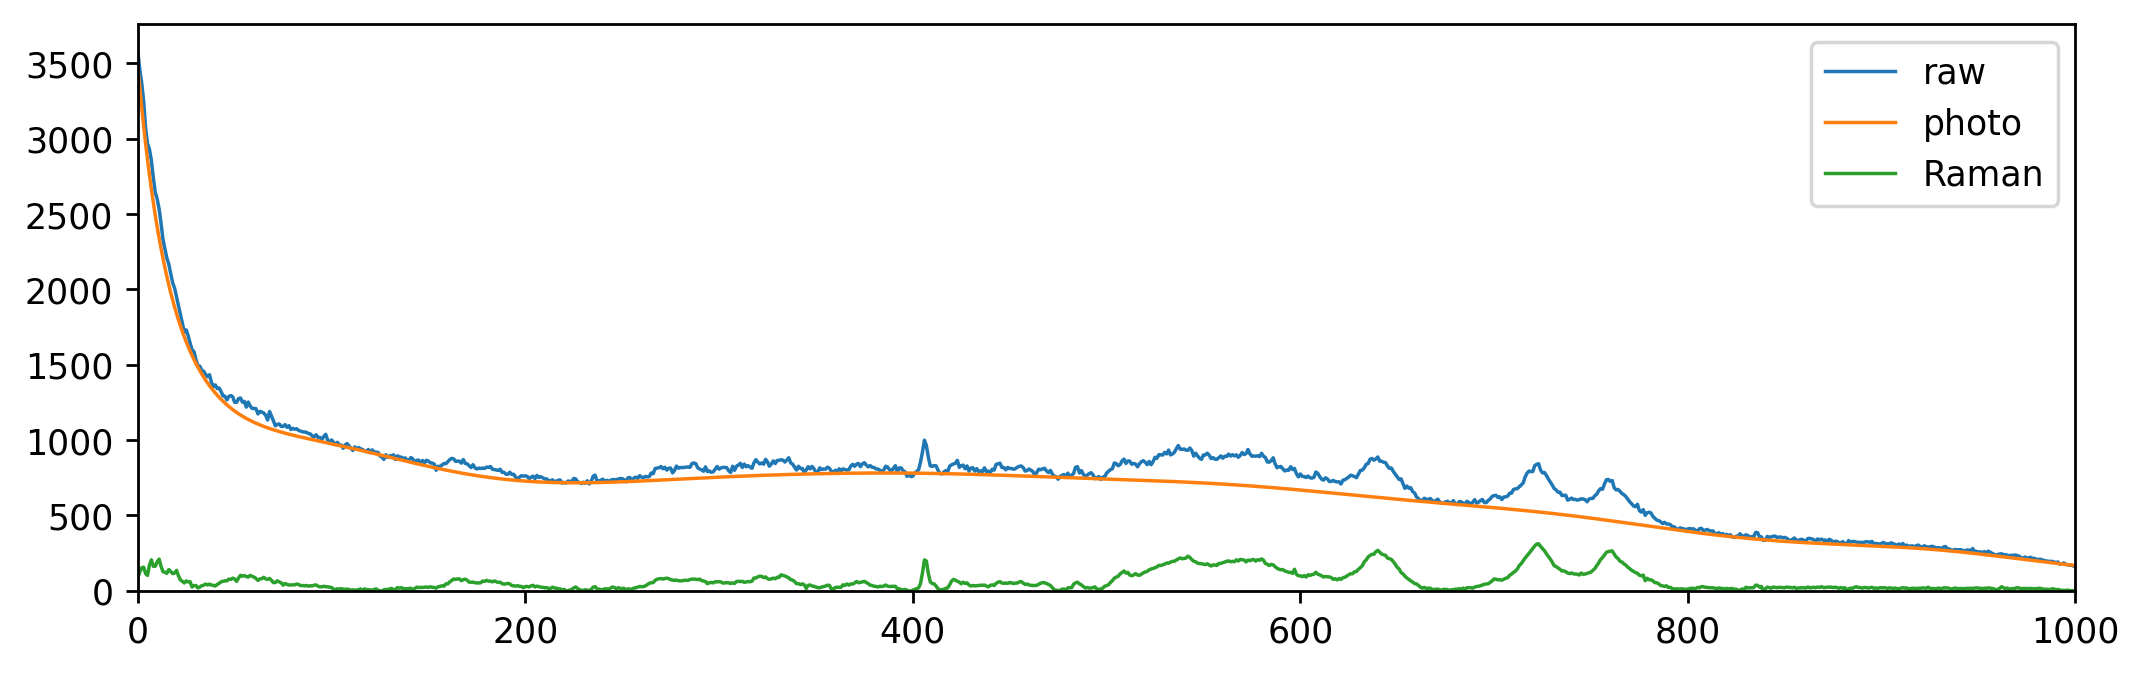

In [21]:
raman = img.reshape(-1, img.shape[-1]) - photo
i = np.random.randint(6300)
i = 2567
print(i)

plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['figure.dpi'] = 250
plt.rcParams['lines.linewidth'] = 1

L,R = 0, 50
plt.plot(dct(img[i], type=2, norm='backward')[L:R] , label="raw")
plt.plot(dct(photo[i], type=2, norm='backward')[L:R], label="photo")
plt.plot(dct(tmp_img[i]-photo[i], type=2, norm='backward')[L:R], label="Raman")
plt.xlim(L,R)
plt.legend()
# plt.xlabel(r"")
# plt.ylabel("intensity")
plt.show()

L,R = 0, 1000
plt.plot((img[i])[L:R] , label="raw")
plt.plot((photo[i])[L:R], label="photo")
plt.plot((tmp_img[i]-photo[i])[L:R], label="Raman")
plt.xlim(0,1000)
plt.ylim(0)
plt.legend()
# plt.xlabel(r"")
# plt.ylabel("intensity")
plt.show()


0